In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Optional: ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Load dataset
df = pd.read_csv("bmi.csv")

# Quick view
print(df.head())
print(df.info())
print(df['Index'].value_counts())

   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB
None
Index
5    198
4    130
2     69
3     68
1     22
0     13
Name: count, dtype: int64


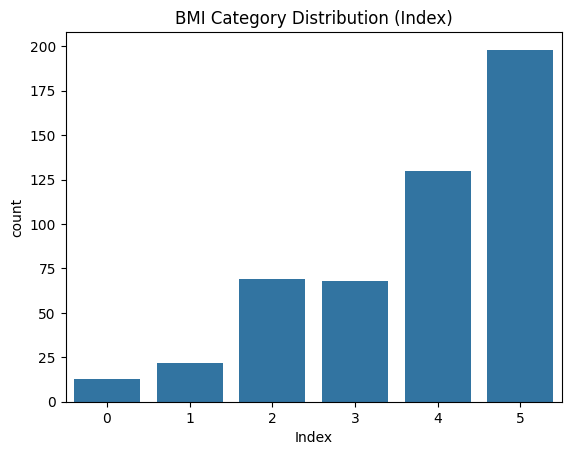

Index
5    39.6
4    26.0
2    13.8
3    13.6
1     4.4
0     2.6
Name: proportion, dtype: float64


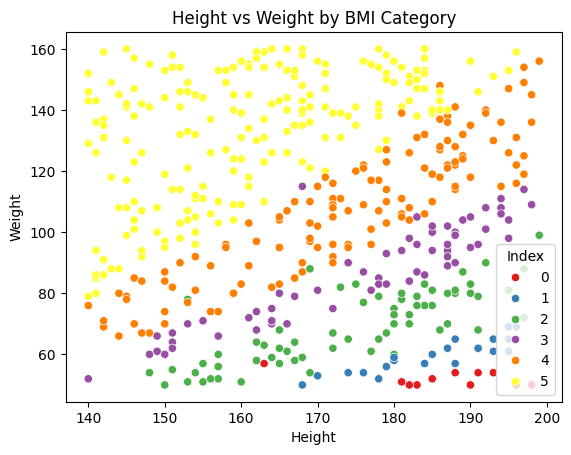

In [20]:
# Class distribution
sns.countplot(x='Index', data=df)
plt.title("BMI Category Distribution (Index)")
plt.show()

# Optional: normalize %
print(df['Index'].value_counts(normalize=True) * 100)

# Height vs Weight scatter plot
sns.scatterplot(x='Height', y='Weight', hue='Index', data=df, palette='Set1')
plt.title("Height vs Weight by BMI Category")
plt.show()

In [21]:
# Encode Gender
df['Gender'] = df['Gender'].replace({'Male':0, 'Female':1})

# Features & target
X = df[['Gender','Height','Weight']]
y = df['Index']

# Train-Test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#SMOTE for Imbalanced Data
try:
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(random_state=42)
    X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)
    print("After SMOTE, class distribution:")
    print(pd.Series(y_train).value_counts())
except:
    print("imblearn not installed, skipping SMOTE.")

After SMOTE, class distribution:
Index
5    159
1    159
4    159
2    159
3    159
0    159
Name: count, dtype: int64


In [23]:
#Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Confusion Matrix - Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Confusion Matrix - Logistic Regression:
[[ 1  2  0  0  0  0]
 [ 2  2  0  0  0  0]
 [ 0  1 12  1  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  2 23  1]
 [ 0  0  0  0  3 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.40      0.50      0.44         4
           2       1.00      0.86      0.92        14
           3       0.82      1.00      0.90        14
           4       0.88      0.88      0.88        26
           5       0.97      0.92      0.95        39

    accuracy                           0.88       100
   macro avg       0.74      0.75      0.74       100
weighted avg       0.89      0.88      0.88       100



In [24]:
#Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Confusion Matrix - Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix - Random Forest:
[[ 3  0  0  0  0  0]
 [ 1  2  1  0  0  0]
 [ 0  1 12  1  0  0]
 [ 0  0  1  9  4  0]
 [ 0  0  0  0 23  3]
 [ 0  0  0  0  4 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.67      0.50      0.57         4
           2       0.86      0.86      0.86        14
           3       0.90      0.64      0.75        14
           4       0.74      0.88      0.81        26
           5       0.92      0.90      0.91        39

    accuracy                           0.84       100
   macro avg       0.81      0.80      0.79       100
weighted avg       0.85      0.84      0.84       100



In [25]:
#Human-readable Categories
df_test = X_test.copy()
df_test['Actual_Index'] = y_test.values
df_test['Predicted_Index'] = y_pred_rf

# Map to categories
index_map = {
    0: 'Extremely Weak',
    1: 'Weak',
    2: 'Normal',
    3: 'Overweight',
    4: 'Obesity',
    5: 'Extreme Obesity'
}

df_test['Actual_Category'] = df_test['Actual_Index'].map(index_map)
df_test['Predicted_Category'] = df_test['Predicted_Index'].map(index_map)

# Preview predictions
df_test.head(10)

,Gender,Height,Weight,Actual_Index,Predicted_Index,Actual_Category,Predicted_Category
348,0,178,138,5,5,Extreme Obesity,Extreme Obesity
36,1,197,114,3,4,Overweight,Obesity
0,0,174,96,4,4,Obesity,Obesity
81,1,166,140,5,5,Extreme Obesity,Extreme Obesity
102,0,161,155,5,5,Extreme Obesity,Extreme Obesity
421,0,140,146,5,5,Extreme Obesity,Extreme Obesity
412,0,181,154,5,5,Extreme Obesity,Extreme Obesity
185,0,165,80,3,3,Overweight,Overweight
246,0,182,98,3,4,Overweight,Obesity
391,1,180,70,2,2,Normal,Normal


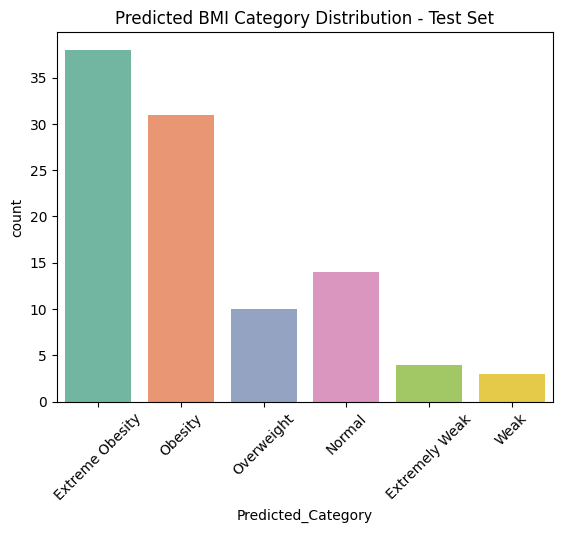

In [26]:
#Prediction Visualization
sns.countplot(x='Predicted_Category', data=df_test, palette='Set2')
plt.title("Predicted BMI Category Distribution - Test Set")
plt.xticks(rotation=45)
plt.show()

In [27]:
# df_test contains:
# Gender, Height, Weight, Actual_Index, Predicted_Index, Actual_Category, Predicted_Category

df_test.to_csv("BMI_Predictions.csv", index=False)
print("CSV file saved as 'BMI_Predictions.csv'")


CSV file saved as 'BMI_Predictions.csv'


In [28]:
# Scale full dataset features
X_scaled = scaler.transform(X)  # X = full dataset features

# Predict on full dataset
y_pred_full = rf.predict(X_scaled)

# Add predictions to original dataframe
df['Predicted_Index'] = y_pred_full
df['Predicted_Category'] = df['Predicted_Index'].map({
    0: 'Extremely Weak',
    1: 'Weak',
    2: 'Normal',
    3: 'Overweight',
    4: 'Obesity',
    5: 'Extreme Obesity'
})

# Save to CSV
df.to_csv("BMI_Full_Predictions.csv", index=False)
print("CSV file saved as 'BMI_Full_Predictions.csv' with 500 rows!")


CSV file saved as 'BMI_Full_Predictions.csv' with 500 rows!


In [2]:
import pandas as pd

# 1. Load your exact CSV file
df = pd.read_csv("BMI_Full_Predictions.csv")

# 2. Check columns (optional but good practice)
print(df.columns)

# 3. Clean & normalize Gender column
df["Gender"] = df["Gender"].map({
    0: "Male",
    1: "Female"
})

# 4. Ensure numeric columns are correct
df["Height"] = df["Height"].astype(float)
df["Weight"] = df["Weight"].astype(float)
df["Predicted_Index"] = df["Predicted_Index"].astype(int)

# 5. (Optional) Keep only required + useful columns
final_df = df[[
    "Gender",
    "Height",
    "Weight",
    "Predicted_Index",
    "Predicted_Category"
]]

# 6. Export to JSON (frontend-friendly format)
final_df.to_json(
    "BMI_Full_Predictions.json",
    orient="records",
    indent=2
)

print("✅ JSON file created successfully!")


Index(['Gender', 'Height', 'Weight', 'Index', 'Predicted_Index',
       'Predicted_Category'],
      dtype='object')
✅ JSON file created successfully!
